Published on September 12, 2024. By Marília Prata, mpwolke

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Competition Citation

@misc{eedi-mining-misconceptions-in-mathematics,

    author = {Jules King, L Burleigh, Simon Woodhead, Panagiota Kon, Perpetual Baffour, Scott Crossley, Walter Reade, Maggie Demkin},
    
    title = { Eedi - Mining Misconceptions in Mathematics},
    publisher = {Kaggle},
    
    year = {2024},

#Four blanks mean: Neither is correct, None of these, Not enough information and Fido is walking away from home

Option on ConstructName column.


![](https://i.pinimg.com/736x/9a/28/e2/9a28e20f95a6225383fee0280e09cec8.jpg)
https://br.pinterest.com/pin/calvin-algebra-misconceptions--123497214756838613/

## Misconceptions

"**Diagnostic Questions (DQs)**, which are multiple-choice questions featuring one correct answer and three incorrect answers, known as **distractors**. Each question targets a specific construct (also referred to as a skill), representing the most granular level of knowledge relevant to the question. Each distractor is designed to correspond with a potential misconception."

The options for the question are labeled with misconceptions as follows:

A - Correct (no distractor)

B - Carries out operations from left to right regardless of priority order

C - Confuses the order of operations, believes addition comes before division

D - Confuses the order of operations, believes addition comes before multiplication

Answer[A/B/C/D]Text - Answer option A text extracted from the question image using human-in-the-loop OCR (str).

**Misconception**[A/B/C/D]Id - Unique misconception identifier (int). Ground truth labels in train.csv; your task is to predict these labels for test.csv.

https://www.kaggle.com/competitions/eedi-mining-misconceptions-in-mathematics/data

In [ ]:
train = pd.read_csv('../input/eedi-mining-misconceptions-in-mathematics/train.csv', nrows=200)
train.tail()

## Auto-Generated Distractors in Multiple Choice Questions

Citation: Lishan Zhang & Kurt VanLehn (2019): Evaluation of auto-generated distractors in multiple choice questions from a semantic network, Interactive Learning Environments, DOI:10.1080/10494820.2019.1619586To 

https://doi.org/10.1080/10494820.2019.1619586Published  

"Despite their drawback, multiple-choice questions are an enduring feature in instruction because they can be answered more rapidly than open response questions and they are easily scored. However, it can be difficult to generate good incorrect choices (called “distractors”)."

"The authors designed an algorithm to generate distractors from a semantic network for four types of multiple choice questions in biology. The machine-generated distractors were compared to human-generated distractors in terms of question difficulty, question discrimination and distractor usefulness. The machine-generated and human-generated distractors performed very closely on all the three measures, suggesting that generating distractors from a semantic network for simple multiple choice questions is a viable method."

“What” questions 

“What”questions ask what sub-processes a parent process contains. A good distractor should be a sub-process contained by a related process to the parent process. Now the issue is to find the related processes. Two processes were considered to be related to each other if they satisﬁed one of the three conditions below:
(1) The two processes shared the same parent process.

(2) The two processes shared at least one product.

(3) The two processes shared at least one raw material

“Connection”questions 

"Connection questions ask what products of one process are consumed by another process. Two types of entities were used as distractors. One was the set of products of the ﬁrst process that were not used as the inputs to the second process, and the other was the set of raw materials of the latter process that were not able to be produced by the ﬁrst process."

Post-possessing 

"For various reasons explained below, not all the distractors generated from the 4 schemas above could be used in the evaluation. Thus, the authors used “raw distractors” for those generated by the schemas, and the “final distractors” for those selected to be included in the evaluation. This section describes how raw distractors were further processed to be final distractors. In terms of stems, the original machine-generated open response questions could potentially be processed to be the stems in the corresponding multiple choice questions. However, they wanted to evaluate how machine-generated distractors compared to human-generated distractors."

Question difficulty

"A question’s difficulty refflects the proportion of students who is able to answer the question correct. However, the higher the value is, the more difficcult the question is. A question’s difficulty is calculated as: Equation (1)Dif (Q)=1−NcN(1) where Ncis the number of students who answered the question correctly and Nis the total number of students who answered the question. A  good test should have questions whose difficulties are distributed uniformly across a range."

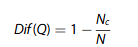

Usefulness of distractors 

"In addition to the difficulty and discrimination of a whole multiple choice question, the authors are also interested in the usefulness of each distractor. The usefulness of a distractor is measured in terms of whether the distractor had been selected by any students. Because their control and experimental groups had almost the same number of participants, a distractor was considered as useful if at least one student selected it."

In [ ]:
misconception = pd.read_csv('../input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv')
misconception.tail()

## The importance of quality distractors 

Semantic similarity of distractors in multiple-choice tests: extrinsic evaluation 

Authors: Ruslan Mitkov, Le An Ha, Andrea Varga and Luz Rello

"One of the interesting research questions which emerged during the above research was how better quality distractors could automatically be chosen. In fact user evaluation showed that from the three main tasks performed in the generation of multiple choice tests (term identification, sentence transformation and distractor selection), it was distractor selection which needed further improvement with a view to putting it in practical use." 

"Distractors play a vital role for the process of multiple-choice testing in that good quality distractors ensure that the outcome of the tests provides more credible and objective picture of the knowledge of the testees involved. On the other hand, poor distractors would not contribute much to the accuracy of the assessment as obvious or too easy distractors will pose no challenge to the students and as a result, will not be able to distinguish high performing from low performing learners."

"The principle according to which the distractors were chosen, was semantic similarity. The semantically closer were the distractors to the correct answer, the most ‘plausible’ they were deemed to be. The rationale behind this consists in the fact that distractors semantically distant from the correct answer could make guessing a ‘straightforward task’. By way an example, if processing the sentence ‘Syntax is the branch of linguistics which studies the way words are put together into sentences’, the multiple-choice generation system would identify syntax as an important term, would transform the sentence into the question ‘Which branch of linguistics studies the way words are put together into sentences?" and would choose ‘Pragmatics’, ‘Morphology’ and ‘Semantics’ as distractors 
to the correct answer ‘Syntax’, being closer to  it than ‘Chemistry’, ‘Football’ or ‘Beer’ for instance (which if offered as distractors, would be easily dismissed by people who do not have even any knowledge of linguistics)."

"To generate a list of **distractors for single word terms** the function coordinate terms in **WordNet** is employed. For **multi-word terms**, noun phrases with the same head as the correct answers appearing in the source text as well as entry terms from Wikipedia having the same head with the correct answers, are used to compile the list of distractors."

Different methods for **selection of Distractors in Multiple-choice tests**. 

"The authors conducted extrinsic evaluation of several similarity methods (collocation patterns; four different methods of WordNet based semantic similarity: extended gloss overlap measure, Leacock and Chodorow’s, Jiang and Conrath’s as well as Lin’s measures; distributional similarity; phonetic similarity; mixed strategy) by seeking to establish which one would be most suitable for the task of 
selection of distractors in multiple-choice tests."

https://aclanthology.org/W09-0207.pdf

In [ ]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

import keras
import keras_nlp

#Gemma 2b_en

In [ ]:
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
#gemma_lm.summary()

In [ ]:
#By York Yong https://www.kaggle.com/code/yorkyong/gemma-trial-ace-a-data-science-interview

Eedi_dataset = []
    
for index, row in train.iterrows():
    question, answer = row['ConstructName'], row['AnswerDText']
    template = (f"ConstructName:\n{question}\n\nAnswerDText:\n{answer}")
    Eedi_dataset.append(template)

#LoRA

In [ ]:
# Enable LoRA for the model and set the LoRA rank to 64.
gemma_lm.backbone.enable_lora(rank=64)

## Control Memory Usage

In [ ]:
# Limit the input sequence length to 512 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 512
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

## Epochs

I reduced number of rows to see if if Epochs run faster with less data.

In [ ]:
%%time

gemma_lm.fit(Eedi_dataset, epochs=1, batch_size=1)

## Answer those Maths questions Gemma

In [ ]:
train['ConstructName'][13]

In [ ]:
train['ConstructName'][17]

In [ ]:
train['ConstructName'][20]

In [ ]:
train['ConstructName'][10]

In [ ]:
train['ConstructName'][7]

In [ ]:
train['ConstructName'][2]

#id 198

In [ ]:
%%time
print(gemma_lm.generate("Convert from km² to m²", max_length=256))

In [ ]:
%%time
print(gemma_lm.generate("Round numbers to one decimal place", max_length=256))

In [ ]:
%%time
print(gemma_lm.generate("Convert from minutes to seconds", max_length=256))

In [ ]:
%%time
print(gemma_lm.generate("Find the reciprocal of a fraction", max_length=256))

In [ ]:
%%time
print(gemma_lm.generate("Recognise a linear graph from its shape", max_length=256))

### I'll check answers after the model stops.

## Enough said

![](https://cdn.slidesharecdn.com/ss_thumbnails/educ11port2-171021053935-thumbnail.jpg?width=640&height=640&fit=bounds)SlideShare

#Acknowledgements

York Yong https://www.kaggle.com/code/yorkyong/gemma-trial-ace-a-data-science-interview

mpwolke https://www.kaggle.com/code/mpwolke/what-is-1-1-gemma